In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

from utils import MyGradientBoostingRegressor, MyBaggingRegressor

In [3]:
X_train = []
y_train = []
with open('reg.train.txt', 'r', encoding = 'utf-8') as f:
    for line in f.readlines():
        res = [-999 for i in range(245)]
        y_train.append(float(line.split(' ')[0]))
        tmp = line.split(' ')[1:-1]
        tmp = [t.split(':') for t in tmp]
        for t in tmp:
            res[int(t[0]) - 1] = float(t[1])
        X_train.append(res)

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = []
y_test = []
with open('reg.test.txt', 'r', encoding = 'utf-8') as f:
    for line in f.readlines():
        res = [-999 for i in range(245)]
        y_test.append(float(line.split(' ')[0]))
        tmp = line.split(' ')[1:-1]
        tmp = [t.split(':') for t in tmp]
        for t in tmp:
            res[int(t[0]) - 1] = float(t[1])
        X_test.append(res)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [4]:
model = GradientBoostingRegressor(n_estimators=200)
mymodel = MyGradientBoostingRegressor(n_estimators=200)
mymodel_skGBR = MyGradientBoostingRegressor(n_estimators=200, base_estimator=DecisionTreeRegressor)
start_time1 = time.time()
model.fit(X_train, y_train)
start_time2 = time.time()
mymodel.fit(X_train, y_train)
start_time3 = time.time()
mymodel_skGBR.fit(X_train, y_train)
print('time of sklearn GBR: {:.2f}, custom GBR with sklearn Decision Tree: {:.2f}, custom GBR: {:.2f}'
      .format(start_time2 - start_time1, start_time3 - start_time2, time.time() - start_time3))

time of sklearn GBR: 43.87, custom GBR with sklearn Decision Tree: 293.33, custom GBR: 41.31


In [5]:
a = model.staged_predict(X_test)
b = mymodel_skGBR.staged_predict(X_test)
c = mymodel.staged_predict(X_test)

In [6]:
model_err = np.array([mean_squared_error(y_test, y_pred) for y_pred in a])
model_skGBR_err = np.array([mean_squared_error(y_test, y_pred) for y_pred in b])
mymodel_err = np.array([mean_squared_error(y_test, y_pred) for y_pred in c])

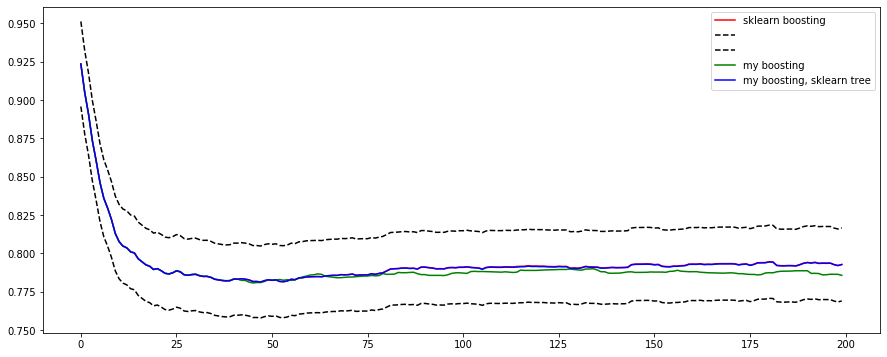

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(model_err, 'r')
plt.plot(model_err + 0.03 * model_err, '--k')
plt.plot(model_err - 0.03 * model_err, '--k')
plt.plot(mymodel_err, 'g')
plt.plot(model_skGBR_err, 'b')
plt.legend(['sklearn boosting', '', '', 'my boosting', 'my boosting, sklearn tree'])
plt.show()

In [10]:
estim = 5
model = BaggingRegressor(base_estimator=GradientBoostingRegressor(n_estimators=200),
                         n_estimators=estim, 
                         bootstrap=False,
                         max_samples=0.6,
                         max_features=0.6)
mymodel = MyBaggingRegressor(base_estimator=MyGradientBoostingRegressor(n_estimators=200, 
                                                                        base_estimator=DecisionTreeRegressor),
                             n_estimators=estim,
                             max_samples=0.6, 
                             max_features=0.6)
start_time1 = time.time()
model.fit(X_train, y_train)
start_time2 = time.time()
mymodel.fit(X_train, y_train)
print('time of sklearn BagBoo: {:.2f}, custom BagBoo: {:.2f}'
      .format(start_time2 - start_time1, time.time() - start_time2))
print('MSE of sklearn BagBoo: {:.6f}, custom BagBoo: {:.6f}'
      .format(mean_squared_error(y_test, model.predict(X_test)), 
              mean_squared_error(y_test, mymodel.predict(X_test))))

time of sklearn BagBoo: 34.98, custom BagBoo: 49.18
MSE of sklearn BagBoo: 0.793282, custom BagBoo: 0.792621
